In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc('font',family='Century Gothic')
import matplotlib.pyplot as plt
import sys
import numpy as np

In [2]:
def readFile(filename):
    #read file
    f = open(filename,'r')
    Mods = []
    Data = []
    i = 0
    for line in f:
        if i == 0:
            Labels = line.strip().strip(',').split(',')
            i = 1
        else:
            cols = line.replace('%','').strip().split(',')
            if cols[0] == 'Total':
                break
            Mods.append(cols[0])
            Data.append(map(int,cols[1:]))
    h,w = np.array(Data).shape
    if h != len(Mods) or w != len(Labels):
        sys.exit("Labels and data don't match.")

    #creating dictionary
    Dict = {}
    for m in xrange(len(Mods)):
        mod = Mods[m]
        Dict[mod] = {}
        for a in xrange(len(Labels)):
            action = Labels[a]
            Dict[mod][action] = Data[m][a]
            
    return Dict

In [3]:
#Load data
Files = (1610, 1806) #first, last file to read

Dicts = {}
i = Files[0]
while i <= Files[1]:
    filename = '%i.csv' %i
    try:
        dct = readFile(filename)
        Dicts[i] = dct
    except IOError:
        print '%s missing.' %filename
    
    #computing next i
    ij = i/100
    im = i - ij * 100
    
    im = (im + 1) % 12
    if im == 0:
        im = 12
    elif im == 1:
        ij = ij + 1
        
    i = 100 * ij + im    

1707.csv missing.
1708.csv missing.
1709.csv missing.
1710.csv missing.
1711.csv missing.
1712.csv missing.


In [4]:
#list of bots
Bots = ['lubichsBot','SEO_Nuke','reddit','AutoModerator','javacode']

In [5]:
Months = sorted(Dicts.keys())
NMonths = len(Months)
keyNumbers = [['Total','total mod actions'],
                   ['ban user','banned users'],
                   ['approve post','approved posts'],
                   ['remove post','removed posts'],
                   ['approve comment','approved comments'],
                   ['remove comment','removed comments']]

In [6]:
#fill data in new dict
Data = {}

for key, _ in keyNumbers:
    numbers = np.zeros(NMonths)
    for i, month in zip(range(NMonths),Months):
        Moderators = Dicts[month].keys()
        number = 0
        for mod in Moderators:
            if mod not in Bots:
                n = Dicts[month][mod][key]
                number = number + n
        numbers[i] = number
    Data[key] = numbers
    
#make months labels
MonthsL = []
Holes = []
skipmonth = 2

im_prev = None
for ndx,i in enumerate(Months):
    ij = i/100
    im = i - ij * 100
    if ndx%skipmonth==0:
        monthL = '%02i.%i' %(im,ij)
    else:
        monthL = ''
    MonthsL.append(monthL)
    
    #check if there is a hole in the data
    if ndx != 0:
        diff = ((im-1)-(im_prev-1))%12
        if diff > 1:
            Holes.append(ndx)    
    im_prev = im
    
Data['Months'] = MonthsL
Data['Holes']  = Holes

In [7]:
#compute additional data
Data['post approval ratio'] = Data['approve post']/(Data['approve post'] + Data['remove post'])
Data['comment approval ratio'] = Data['approve comment']/(Data['approve comment'] + Data['remove comment'])
Data['ban ratio'] = Data['ban user']/Data['Total']

C:\Users\Leonard\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


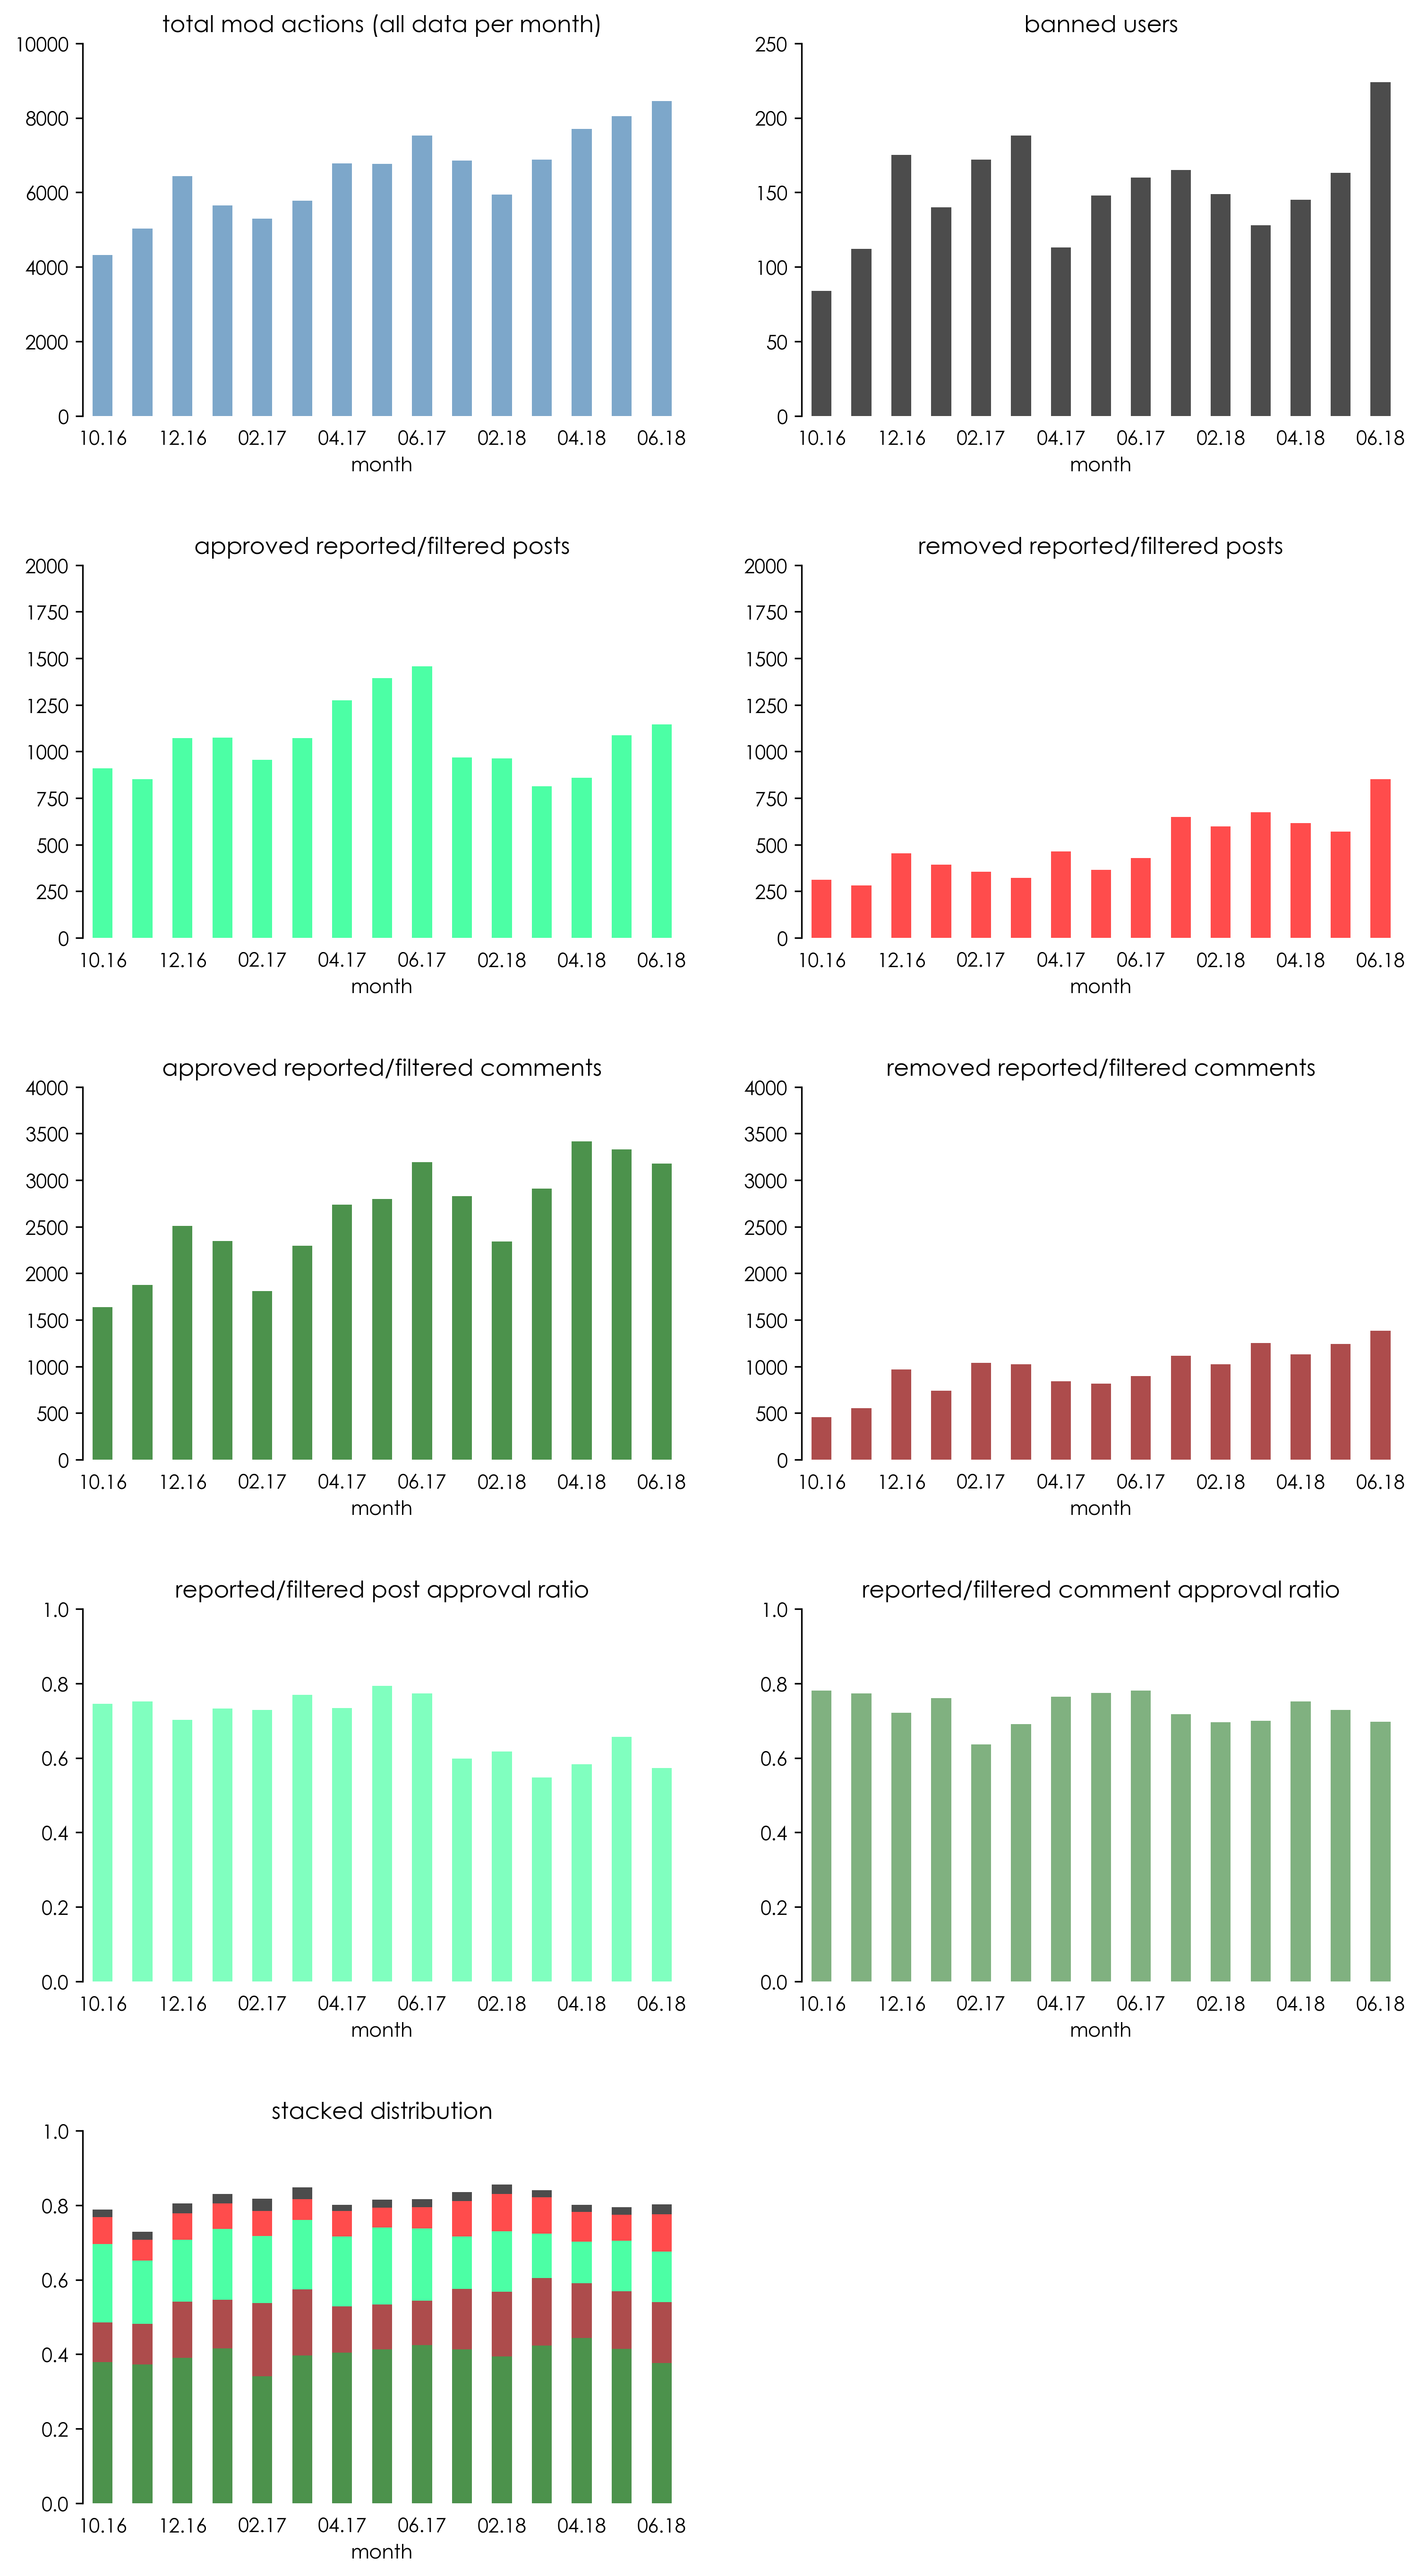

In [8]:
#plotting bars
f, ax = plt.subplots(5,2, figsize=(12, 23), dpi=300, facecolor='white', frameon=False)
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

MonthsI = np.arange(NMonths)
width = 0.5
alpha = 0.7

### Total
ax[0][0].bar(MonthsI, Data['Total'],width,linewidth=0, color='steelblue', alpha=alpha)
ax[0][0].set_ylim(0,10000)
ax[0][0].set_title('total mod actions (all data per month)')
ax[0][0].set_xlabel('month')

### Bans
ax[0][1].bar(MonthsI, Data['ban user'],width,linewidth=0, color='black', alpha=alpha)
ax[0][1].set_ylim(0,250)
ax[0][1].set_title('banned users')
ax[0][1].set_xlabel('month')

### Post approval
ax[1][0].bar(MonthsI, Data['approve post'],width,linewidth=0, color='springgreen', alpha=alpha)
ax[1][0].set_ylim(0,2000)
ax[1][0].set_title('approved reported/filtered posts')
ax[1][0].set_xlabel('month')

### Post removal
ax[1][1].bar(MonthsI, Data['remove post'],width,linewidth=0, color='red', alpha=alpha)
ax[1][1].set_ylim(0,2000)
ax[1][1].set_title('removed reported/filtered posts')
ax[1][1].set_xlabel('month')

### Comment approval
ax[2][0].bar(MonthsI, Data['approve comment'],width,linewidth=0, color='darkgreen', alpha=alpha)
ax[2][0].set_ylim(0,4000)
ax[2][0].set_title('approved reported/filtered comments')
ax[2][0].set_xlabel('month')

### Comment removal
ax[2][1].bar(MonthsI, Data['remove comment'],width,linewidth=0, color='darkred', alpha=alpha)
ax[2][1].set_ylim(0,4000)
ax[2][1].set_title('removed reported/filtered comments')
ax[2][1].set_xlabel('month')

### Post approval ratio
ax[3][0].bar(MonthsI, Data['post approval ratio'],width,linewidth=0, color='springgreen', alpha=alpha-0.2)
ax[3][0].set_ylim([0,1])
ax[3][0].set_title('reported/filtered post approval ratio')
ax[3][0].set_xlabel('month')

### Comment approval ratio
ax[3][1].bar(MonthsI, Data['comment approval ratio'],width,linewidth=0, color='darkgreen', alpha=alpha-0.2)
ax[3][1].set_ylim([0,1])
ax[3][1].set_title('reported/filtered comment approval ratio')
ax[3][1].set_xlabel('month')

### Stacked distribution
ax[4][0].bar(MonthsI, Data['approve comment']/Data['Total'],
             width,linewidth=0, color='darkgreen', alpha=alpha)
ax[4][0].bar(MonthsI, Data['remove comment']/Data['Total'],
             width,linewidth=0, color='darkred', alpha=alpha, bottom=Data['approve comment']/Data['Total'])
ax[4][0].bar(MonthsI, Data['approve post']/Data['Total'],
             width,linewidth=0, color='springgreen', alpha=alpha, 
             bottom=(Data['approve comment']+Data['remove comment'])/Data['Total'])
ax[4][0].bar(MonthsI, Data['remove post']/Data['Total'],
             width,linewidth=0, color='red', alpha=alpha, 
             bottom=(Data['approve comment']+Data['remove comment']+Data['approve post'])/Data['Total'])
ax[4][0].bar(MonthsI, Data['ban user']/Data['Total'],
             width,linewidth=0, color='black', alpha=alpha,
             bottom=(Data['approve comment']+Data['remove comment']+Data['approve post']+Data['remove post'])/Data['Total'])
ax[4][0].set_ylim(0,1)
ax[4][0].set_title('stacked distribution')
ax[4][0].set_xlabel('month')

ax[4][1].axis('off')


for a in ax.flatten():
    a.set_xlim(-width,NMonths-width)
    a.set_xticks(MonthsI)
    a.set_xticklabels(Data['Months'])
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    #a.spines['left'].set_visible(False)

    a.tick_params(top="off")
    a.tick_params(bottom="off")
    a.tick_params(right="off")
    #a.tick_params(left="off")
    
plt.savefig('modStat.png',bbox_inches='tight',dpi=500)

In [9]:
def plotLine(ax, X, Y, Holes, args={}):
    h_prev = 0
    for h in Holes:
        ax.plot(X[h_prev:h],Y[h_prev:h],**args)
        h_prev = h
    ax.plot(X[h_prev:],Y[h_prev:],**args)

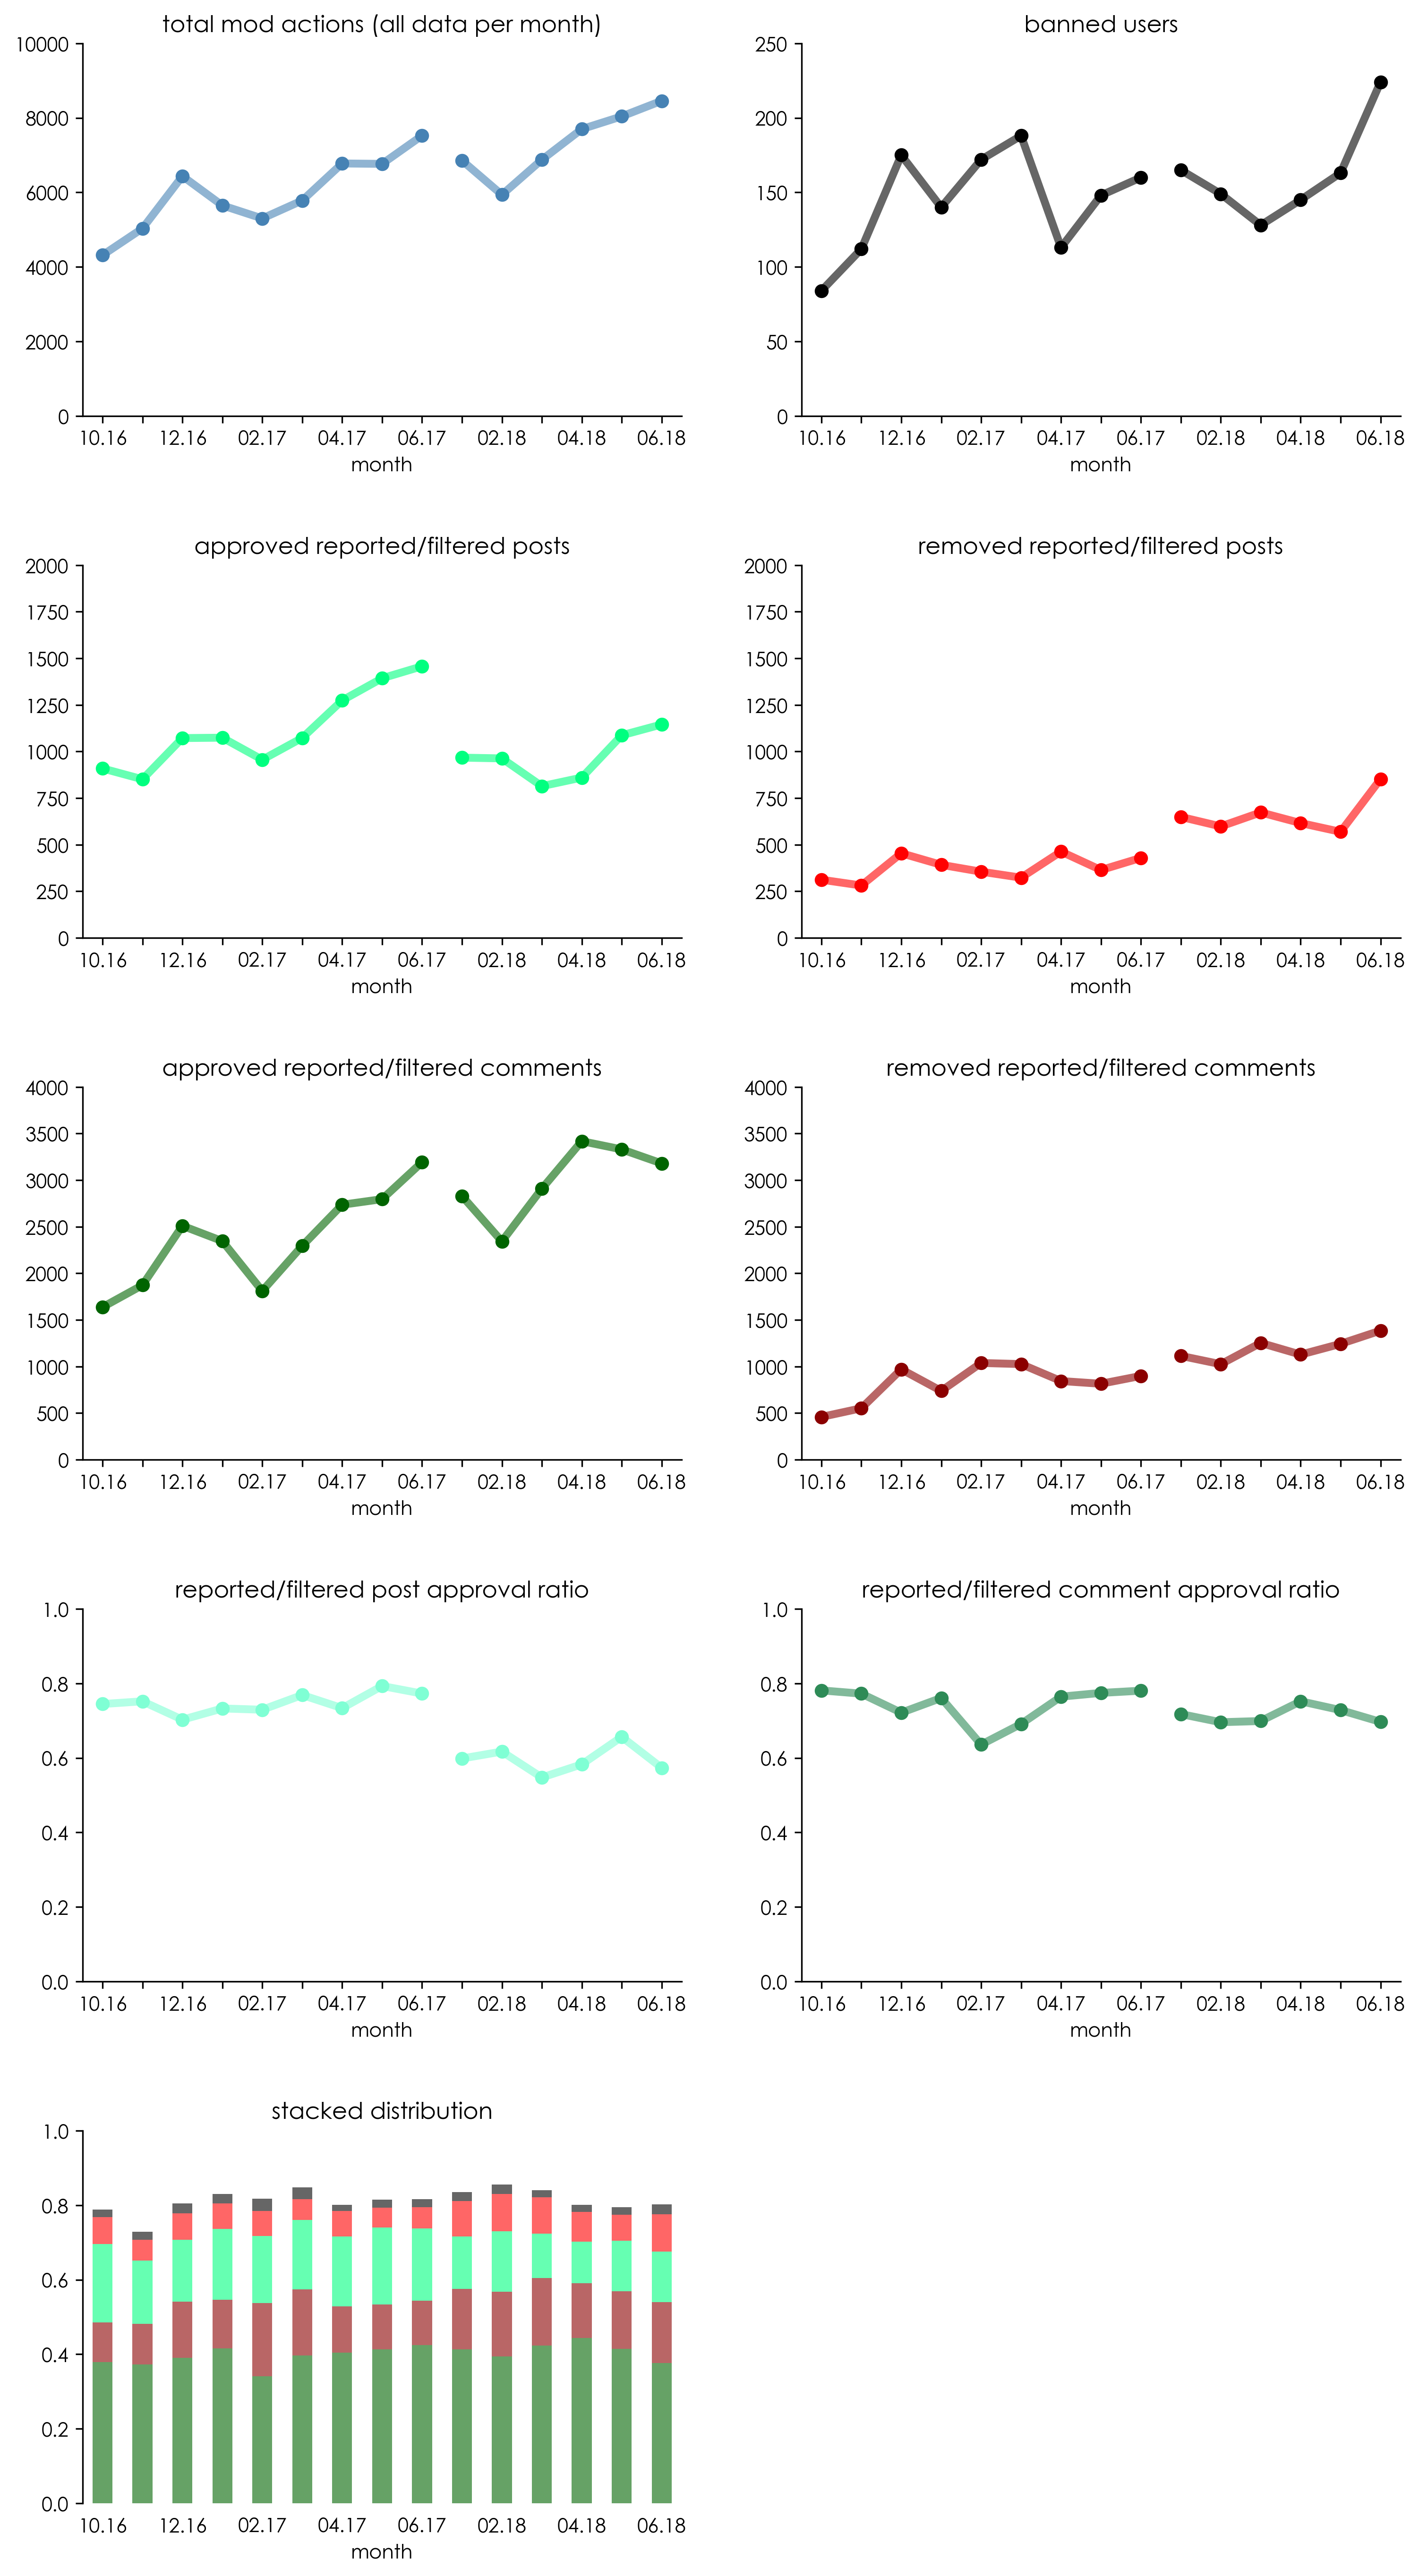

In [10]:
#plotting lines
f, ax = plt.subplots(5,2, figsize=(12, 23), dpi=300, facecolor='white', frameon=False)
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

MonthsI = np.arange(NMonths)
width = 0.5
alpha_points = 1.0
alpha_lines  = 0.6
linewidth = 4
pointwidth = 50

### Total
plotLine(ax[0][0], MonthsI, Data['Total'], Data['Holes'], 
         args={'color': 'steelblue', 'linewidth': linewidth, 'alpha': alpha_lines})
ax[0][0].scatter(MonthsI, Data['Total'], s=pointwidth, color='steelblue', alpha=alpha_points, lw=0)
ax[0][0].set_ylim(0,10000)
ax[0][0].set_title('total mod actions (all data per month)')
ax[0][0].set_xlabel('month')

### Bans
plotLine(ax[0][1], MonthsI, Data['ban user'], Data['Holes'], 
         args={'color': 'black', 'linewidth': linewidth, 'alpha': alpha_lines})
ax[0][1].scatter(MonthsI, Data['ban user'], s=pointwidth, color='black', alpha=alpha_points, lw=0)
ax[0][1].set_ylim(0,250)
ax[0][1].set_title('banned users')
ax[0][1].set_xlabel('month')

### Post approval
plotLine(ax[1][0], MonthsI, Data['approve post'], Data['Holes'], 
         args={'color': 'springgreen', 'linewidth': linewidth, 'alpha': alpha_lines})
ax[1][0].scatter(MonthsI, Data['approve post'], s=pointwidth, color='springgreen', alpha=alpha_points, lw=0)
ax[1][0].set_ylim(0,2000)
ax[1][0].set_title('approved reported/filtered posts')
ax[1][0].set_xlabel('month')

### Post removal
plotLine(ax[1][1], MonthsI, Data['remove post'], Data['Holes'], 
         args={'color': 'red', 'linewidth': linewidth, 'alpha': alpha_lines})
ax[1][1].scatter(MonthsI, Data['remove post'], s=pointwidth, color='red', alpha=alpha_points, lw=0)
ax[1][1].set_ylim(0,2000)
ax[1][1].set_title('removed reported/filtered posts')
ax[1][1].set_xlabel('month')

### Comment approval
plotLine(ax[2][0], MonthsI, Data['approve comment'], Data['Holes'], 
         args={'color': 'darkgreen', 'linewidth': linewidth, 'alpha': alpha_lines})
ax[2][0].scatter(MonthsI, Data['approve comment'], s=pointwidth, color='darkgreen', alpha=alpha_points, lw=0)
ax[2][0].set_ylim(0,4000)
ax[2][0].set_title('approved reported/filtered comments')
ax[2][0].set_xlabel('month')

### Comment removal
plotLine(ax[2][1], MonthsI, Data['remove comment'], Data['Holes'], 
         args={'color': 'darkred', 'linewidth': linewidth, 'alpha': alpha_lines})
ax[2][1].scatter(MonthsI, Data['remove comment'], s=pointwidth, color='darkred', alpha=alpha_points, lw=0)
ax[2][1].set_ylim(0,4000)
ax[2][1].set_title('removed reported/filtered comments')
ax[2][1].set_xlabel('month')

### Post approval ratio
plotLine(ax[3][0], MonthsI, Data['post approval ratio'], Data['Holes'], 
         args={'color': 'aquamarine', 'linewidth': linewidth, 'alpha': alpha_lines})
ax[3][0].scatter(MonthsI, Data['post approval ratio'], s=pointwidth, color='aquamarine', alpha=alpha_points, lw=0)
ax[3][0].set_ylim([0,1])
ax[3][0].set_title('reported/filtered post approval ratio')
ax[3][0].set_xlabel('month')

### Comment approval ratio
plotLine(ax[3][1], MonthsI, Data['comment approval ratio'], Data['Holes'], 
         args={'color': 'seagreen', 'linewidth': linewidth, 'alpha': alpha_lines})
ax[3][1].scatter(MonthsI, Data['comment approval ratio'], s=pointwidth, color='seagreen', alpha=alpha_points, lw=0)
ax[3][1].set_ylim([0,1])
ax[3][1].set_title('reported/filtered comment approval ratio')
ax[3][1].set_xlabel('month')

### Stacked distribution
ax[4][0].bar(MonthsI, Data['approve comment']/Data['Total'],
             width,linewidth=0, color='darkgreen', alpha=alpha_lines)
ax[4][0].bar(MonthsI, Data['remove comment']/Data['Total'],
             width,linewidth=0, color='darkred', alpha=alpha_lines, bottom=Data['approve comment']/Data['Total'])
ax[4][0].bar(MonthsI, Data['approve post']/Data['Total'],
             width,linewidth=0, color='springgreen', alpha=alpha_lines, 
             bottom=(Data['approve comment']+Data['remove comment'])/Data['Total'])
ax[4][0].bar(MonthsI, Data['remove post']/Data['Total'],
             width,linewidth=0, color='red', alpha=alpha_lines, 
             bottom=(Data['approve comment']+Data['remove comment']+Data['approve post'])/Data['Total'])
ax[4][0].bar(MonthsI, Data['ban user']/Data['Total'],
             width,linewidth=0, color='black', alpha=alpha_lines,
             bottom=(Data['approve comment']+Data['remove comment']+Data['approve post']+Data['remove post'])/Data['Total'])
ax[4][0].set_ylim(0,1)
ax[4][0].set_title('stacked distribution')
ax[4][0].set_xlabel('month')

ax[4][1].axis('off')


for a in ax.flatten():
    a.set_xlim(-width,NMonths-width)
    a.set_xticks(MonthsI)
    a.set_xticklabels(Data['Months'])
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    #a.spines['left'].set_visible(False)

    a.tick_params(top="off")
    a.tick_params(right="off")
    #a.tick_params(left="off")
    
    if a == ax[4][0]:
        a.spines['bottom'].set_visible(False)
        a.tick_params(bottom="off")
    
plt.savefig('modStat_lines.png',bbox_inches='tight',dpi=500)